In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#### loading the dataset

In [237]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


####  Data preprocessing including visualization

In [238]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [240]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [241]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [242]:
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [243]:
df =df.drop(columns =['residual sugar', 'free sulfur dioxide', 'pH'],axis =1)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

Outlier removal

<Axes: >

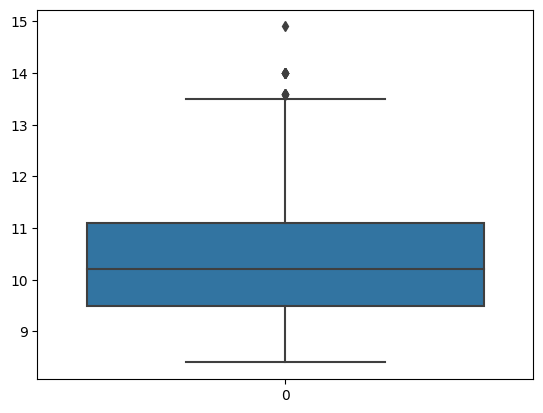

In [245]:
sns.boxplot(df['alcohol'])

In [246]:
q1 = df['alcohol'].quantile(0.25) #Q1
q3 = df['alcohol'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['alcohol']<upper_limit]

In [247]:
q1 = df['sulphates'].quantile(0.25) #Q1
q3 = df['sulphates'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['sulphates']<upper_limit]

In [248]:
q1 = df['density'].quantile(0.25) #Q1
q3 = df['density'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
lower_limit = q3-1.5*IQR
df = df[df['density']<upper_limit]
df = df[df['density']>lower_limit]

In [249]:
q1 = df['total sulfur dioxide'].quantile(0.25) #Q1
q3 = df['total sulfur dioxide'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['total sulfur dioxide']<upper_limit]

In [250]:
q1 = df['fixed acidity'].quantile(0.25) #Q1
q3 = df['fixed acidity'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['fixed acidity']<upper_limit]

In [251]:
q1 = df['volatile acidity'].quantile(0.25) #Q1
q3 = df['volatile acidity'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['volatile acidity']<upper_limit]

In [252]:
q1 = df['citric acid'].quantile(0.25) #Q1
q3 = df['citric acid'].quantile(0.75) #Q3
IQR =q3-q1
upper_limit = q3+1.5*IQR
df = df[df['citric acid']<upper_limit]

<Axes: >

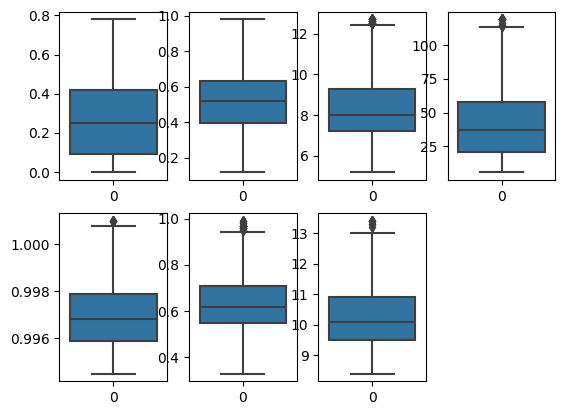

In [253]:
plt.subplot(2, 4, 1)
sns.boxplot(df['citric acid'])
plt.subplot(2, 4, 2)
sns.boxplot(df['volatile acidity'])
plt.subplot(2, 4, 3)
sns.boxplot(df['fixed acidity'])
plt.subplot(2, 4, 4)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(2, 4, 5)
sns.boxplot(df['density'])
plt.subplot(2, 4, 6)
sns.boxplot(df['sulphates'])
plt.subplot(2, 4, 7)
sns.boxplot(df['alcohol'])


<Axes: >

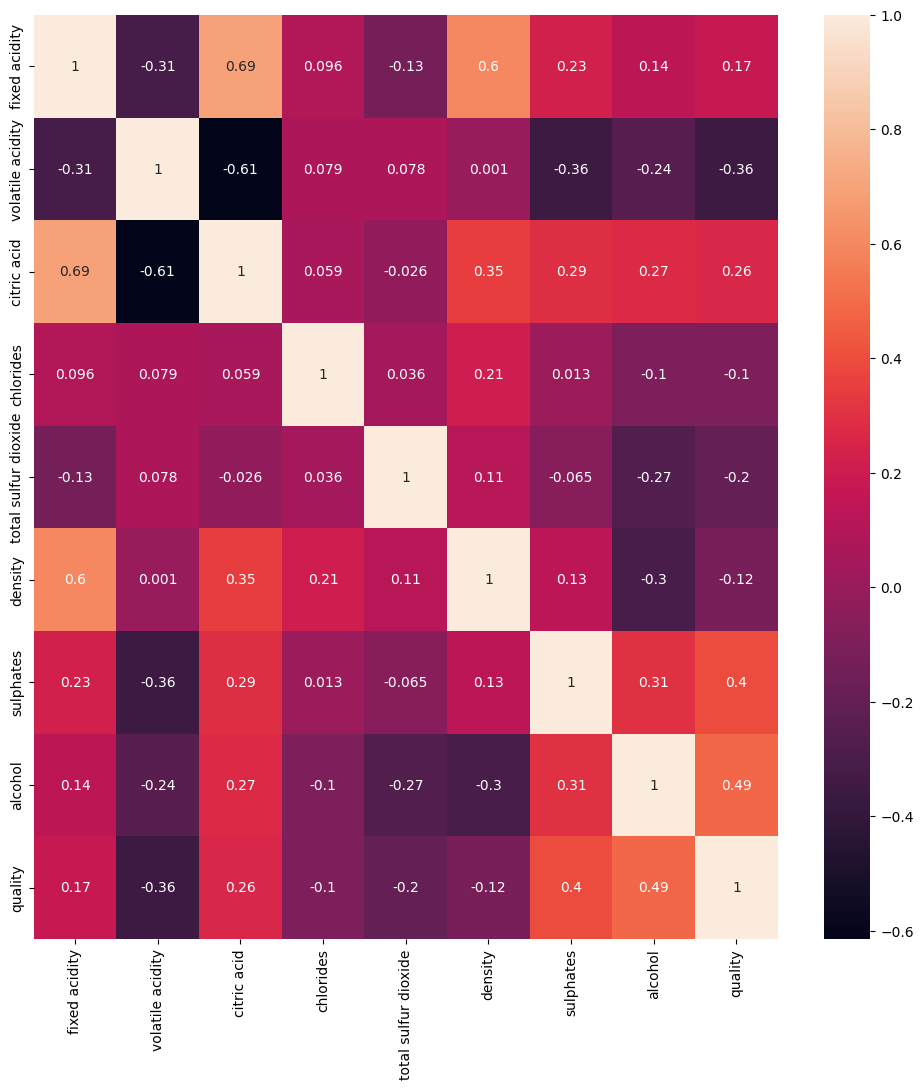

In [254]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

#### Splitting the data

In [255]:
y = df.quality
X = df.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [256]:
scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.293333,0.674419,0.000000,0.108883,0.247788,0.509202,0.348485,0.20
1,0.346667,0.883721,0.000000,0.171920,0.539823,0.355828,0.530303,0.28
2,0.346667,0.744186,0.051282,0.154728,0.424779,0.386503,0.484848,0.28
3,0.800000,0.186047,0.717949,0.106017,0.477876,0.539877,0.378788,0.28
4,0.293333,0.674419,0.000000,0.108883,0.247788,0.509202,0.348485,0.20


In [257]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

SMOTE

In [258]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y.ravel())

Splitting the data

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.25,random_state=1, stratify=y_sm)

In [260]:
print(X_train.shape)
print(X_test.shape)

(2497, 8)
(833, 8)


In [261]:
y_train_series = pd.Series(y_train)
value_counts = y_train_series.value_counts()
# Now you can access the counts
print(value_counts)

5    417
7    416
3    416
4    416
8    416
6    416
dtype: int64


In [262]:
y_test_series = pd.Series(y_test)
value_counts = y_test_series.value_counts()
# Now you can access the counts
print(value_counts)

3    139
6    139
8    139
4    139
7    139
5    138
dtype: int64


####  Machine Learning Model building

KNN

In [263]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [264]:
X_train.shape

(2497, 8)

ANN

In [265]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(8,)))
model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(800,activation='relu'))
model.add(keras.layers.Dense(900,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(400,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='sigmoid'))

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [266]:
with tf.device('GPU:0'):
  model.fit(X_train,y_train,epochs=200)

Epoch 1/200
79/79 [==============================] - 3s 4ms/step - loss: 1.4756 - accuracy: 0.3592
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 1.2001 - accuracy: 0.4750
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 1.0512 - accuracy: 0.5559
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.9611 - accuracy: 0.5891
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.8696 - accuracy: 0.6428
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.9034 - accuracy: 0.6348
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.7759 - accuracy: 0.6964
Epoch 8/200
79/79 [==============================] - 0s 5ms/step - loss: 0.8280 - accuracy: 0.6584
Epoch 9/200
79/79 [==============================] - 0s 6ms/step - loss: 0.7383 - accuracy: 0.7048
Epoch 10/200
79/79 [==============================] - 0s 5ms/step - loss: 0.7023 - accuracy: 0.7165
Epoch 11/

####  Evaluate the model

ANN evaluation

In [267]:
model.evaluate(X_test,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.8727


[0.7321141362190247, 0.8727490901947021]

In [268]:
y_predicted = model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


In [269]:
from collections import Counter
y_predicted_labels = [np.argmax(i) for i in y_predicted]
label_counts = Counter(y_predicted_labels)
for label, count in label_counts.items():
    print(f"Label {label}: Count {count}")

Label 3: Count 143
Label 6: Count 137
Label 5: Count 120
Label 8: Count 141
Label 4: Count 150
Label 7: Count 142


In [270]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predicted_labels)
print(report)

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       139
           4       0.91      0.99      0.95       139
           5       0.77      0.67      0.71       138
           6       0.68      0.67      0.67       139
           7       0.90      0.92      0.91       139
           8       0.98      0.99      0.99       139

    accuracy                           0.87       833
   macro avg       0.87      0.87      0.87       833
weighted avg       0.87      0.87      0.87       833



KNN evaluation

In [271]:
y_predict = knn.predict(X_test)
y_predict_train = knn.predict(X_train)

In [272]:
print('Testing Accuracy = ', accuracy_score(y_test, y_predict))
print('Training Accuracy = ', accuracy_score(y_train, y_predict_train))

Testing Accuracy =  0.7923169267707083
Training Accuracy =  0.8718462154585502


In [273]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[139   0   0   0   0   0]
 [  3 133   0   3   0   0]
 [ 10  23  70  28   7   0]
 [  5  12  33  52  29   8]
 [  0   0   3   7 128   1]
 [  0   0   0   0   1 138]]
              precision    recall  f1-score   support

           3       0.89      1.00      0.94       139
           4       0.79      0.96      0.87       139
           5       0.66      0.51      0.57       138
           6       0.58      0.37      0.45       139
           7       0.78      0.92      0.84       139
           8       0.94      0.99      0.97       139

    accuracy                           0.79       833
   macro avg       0.77      0.79      0.77       833
weighted avg       0.77      0.79      0.77       833

